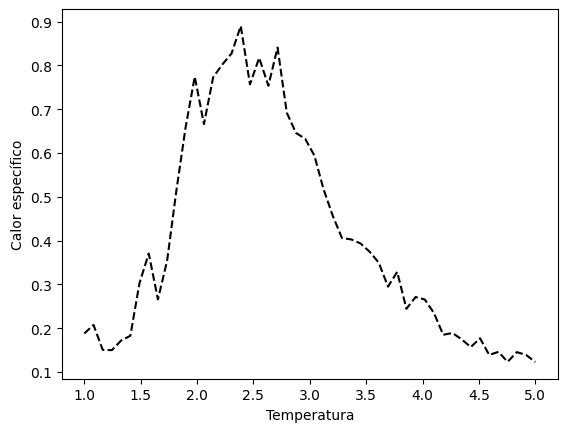

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# fijamos el tamaño de la red recordar que es 2 por 2 es importante.
L = 4

# Temperaturas a considerar
T_min = 1 # temperatura inicial minima
T_max = 5.0 # temperatura maxima final en estas temperatura estara el calor especifico geenrado.
num_T = 50  # hacemos 50 pasos
T_list = np.linspace(T_min, T_max, num_T)    # hacemos un arreglo de la temperatura
# Constante de Boltzmann y energía de interacción J
k_B = 1.0  # hacemos la constante de boltzman igual a 1
J = 1.0   # nuestro ejercicio para la red bidimensional tendra spin igual a 1
# hacemos la funcion para crear la cuadricula de espines 2 por 2.
def espines():
    return np.random.choice([-1, 1], size=(L, L))
# Función para calcular la energía del sistema
def energy(spins):
    E = 0   # inicializamos la energia desde cero
    for i in range(L):
        for j in range(L):
            E -= J * spins[i,j] * (spins[(i+1)%L,j] + spins[i,(j+1)%L]) # hacemos uso de la formula calculada en clase evidenciando el hamiltoniano
    return E  # retornamos la energia total del sistema
# Función para calcular el calor específico del sistema
def calorespecifico(energias, T):  # esta es la funcion para calcular el calor especifico
    beta = 1.0 / (k_B * T)
    E_mean = np.mean(energias)  # calculamos el promedio de la energia.
    E2_mean = np.mean(energias**2)  # hallamos la media de la energia.
    C = beta**2 * (E2_mean - E_mean**2) / L**2   # obtemeos el calor especifico
    return C   # retornamos el calor especifico
# funcion para ver si el spin cambia o no cuando el numero random es menor que la probabilidad hace el cambio.
def change(spins, T):
    i, j = np.random.randint(0, L, size=2)
    # calculamos la anterior energia del sistema
    E_old = energy(spins)
    # cambiamos el espin y calculamos la energia nueva.
    spins[i,j] *= -1
    E_new = energy(spins)
    # Si la energía disminuye, aceptamos el cambio
    if E_new < E_old:  # si el numero aleatorio es decir la energia nueva es menor que la vieja giramos el spin hay otra ubicacion para el spin
        return spins, E_new # retornamos estos valores
    # Si no, aceptamos el cambio con una probabilidad determinada
    else:
        p = np.exp(-(E_new - E_old) / (k_B * T))
        if np.random.rand() < p:
            return spins, E_new
        else:
            spins[i,j] *= -1  # actualizamos el spin.
            return spins, E_old  # cambiamos los espines si la probabilidad del numero aleatorio es menor
# Loop sobre las temperaturas
C_list = []   # definimos la lista donde iremos guardando el calor especifico
for T in T_list:
    # Inicializamos la matriz de espines
    spins = espines()

    
    energias = []
    for step in range(10000):
        spins, E = change(spins, T)
        energias.append(E)           # hacemos 1000 interaciones calculamos las energias nuevas.

    
    C = calorespecifico(np.array(energias), T)   # calor especifico.
    C_list.append(C)

# Graficamos el calor específico vs la temperatura
plt.plot(T_list, C_list,"k--")  # graficamos.
plt.xlabel('Temperatura')
plt.ylabel('Calor específico')
plt.show()






